## Model Training

In [1]:
# Followed tutorial by https://www.youtube.com/watch?v=VNfalYYduD4&ab_channel=KrishNaik
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('algerian_forest_fires_dataset_cleaned.csv')

In [4]:
dataset = dataset.drop(['day','month','year'], axis=1)

In [5]:
dataset['classes'].value_counts()

1    137
0    106
Name: classes, dtype: int64

In [8]:
dataset.head()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [9]:
## Independet and dependent features
X=dataset.drop('fwi', axis=1)
y=dataset['fwi']

In [13]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [16]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [17]:
## Feature Selection base on correlation

In [18]:
X_train.corr()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,classes,region
temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
rh,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
ffmc,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
dmc,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
dc,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
isi,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
bui,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<AxesSubplot:>

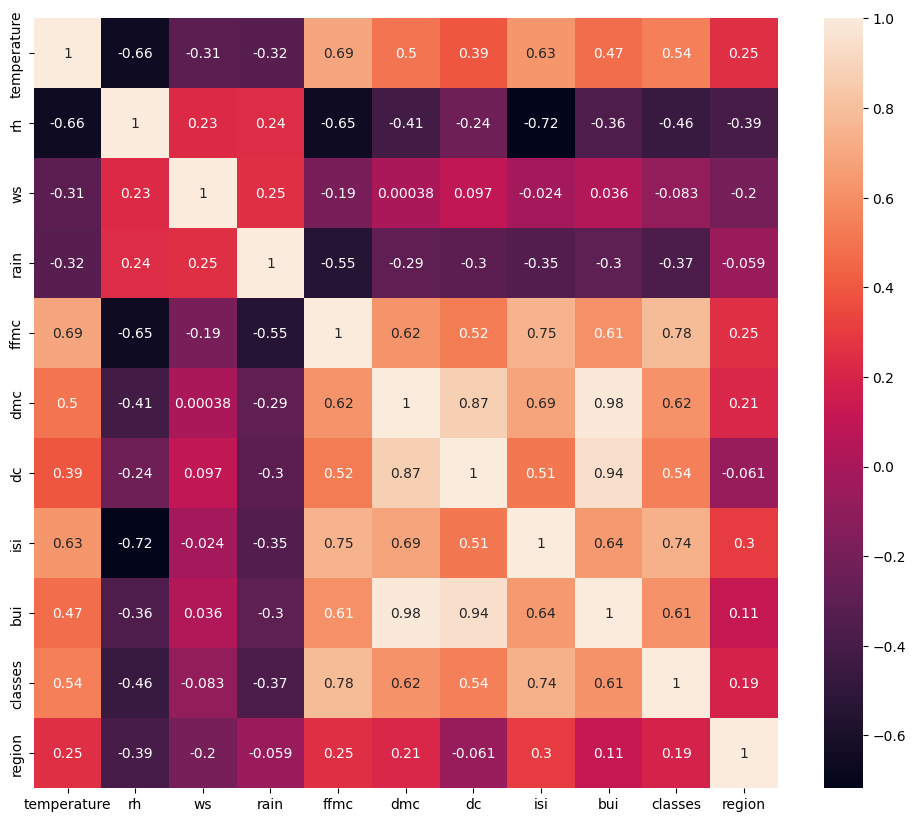

In [20]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)


In [21]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [25]:
## threshold domain expertise
corr_features = correlation(X_train, 0.85)

In [27]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features, axis=1, inplace=True)

In [28]:
X_test.drop(corr_features, axis=1, inplace=True)

In [29]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

## Feature Scaling or Standardization

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

Text(0.5, 1.0, 'X_train After Scaling')

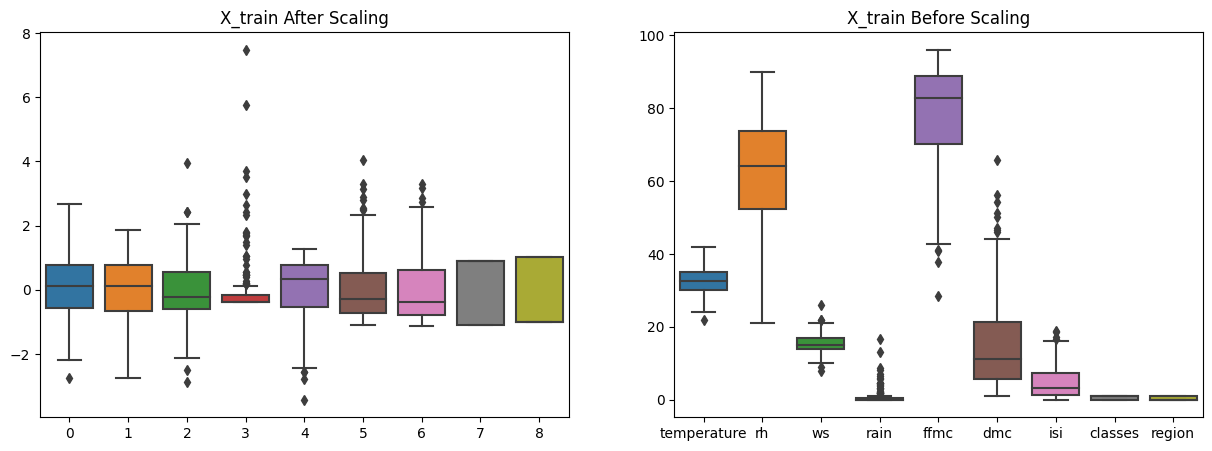

In [38]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,2)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,1)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [49]:
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)
y_pred = linear_regression.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5468236465249972
R2 Score 0.9847657384266951


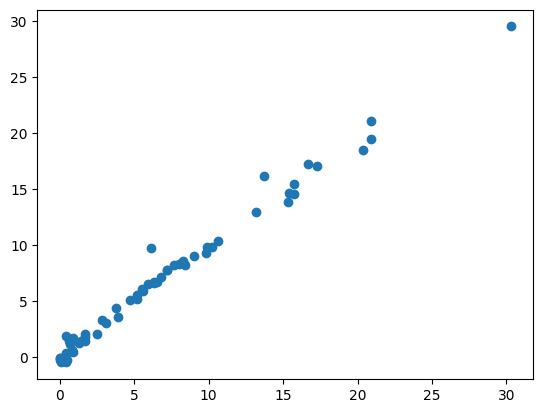

In [50]:
plt.scatter(y_test, y_pred)

## Lasso Regression

In [52]:
from sklearn.linear_model import Lasso

In [53]:
lasso_regression = Lasso()
lasso_regression.fit(X_train_scaled, y_train)
y_pred = lasso_regression.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.1331759949144087
R2 Score 0.9492020263112388


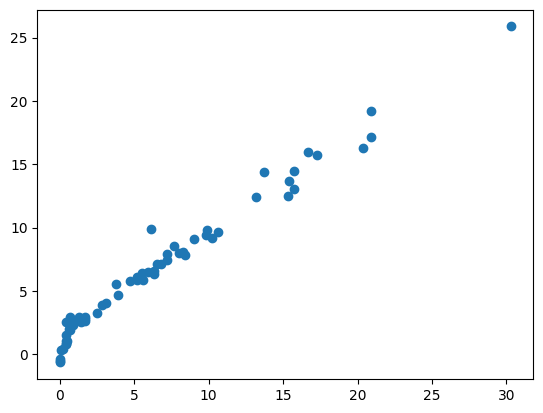

In [54]:
plt.scatter(y_test, y_pred)

#### Cross Validation Lasso

In [62]:
from sklearn.linear_model import LassoCV

In [64]:
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [66]:
lassocv.predict(X_test_scaled)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

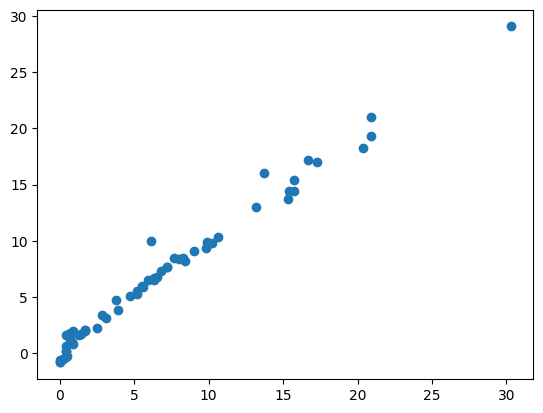

In [71]:
y_pred =  lassocv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)

In [73]:
y_train_pred = lassocv.predict(X_train_scaled)
mae = mean_absolute_error(y_train, y_train_pred)
score = r2_score(y_train, y_train_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.7833173916070536
R2 Score 0.9689655854295935


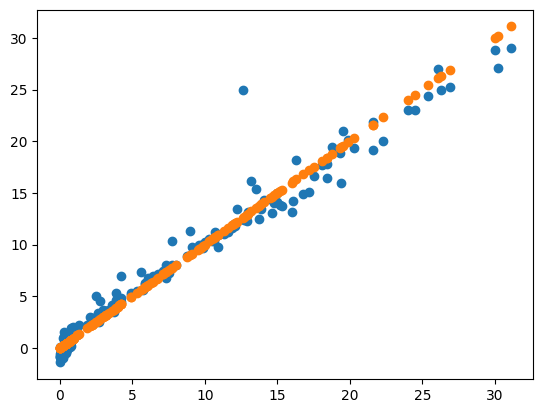

In [75]:
plt.scatter(y_train, y_train_pred)
plt.scatter(y_train, y_train)

In [72]:
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.8822353634896
R2 Score 0.8753460589519703


## Ridge Regression

In [56]:
from sklearn.linear_model import Ridge

In [57]:
ridge_regression = Ridge()
ridge_regression.fit(X_train_scaled, y_train)
y_pred = ridge_regression.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5642305340105728
R2 Score 0.9842993364555512


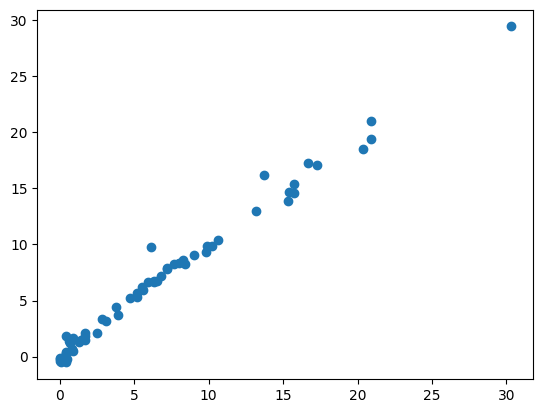

In [58]:
plt.scatter(y_test, y_pred)

## Elasticnet Regression

In [59]:
from sklearn.linear_model import ElasticNet

In [60]:
elastic_regression = ElasticNet()
elastic_regression.fit(X_train_scaled, y_train)
y_pred = elastic_regression.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.8822353634896
R2 Score 0.8753460589519703


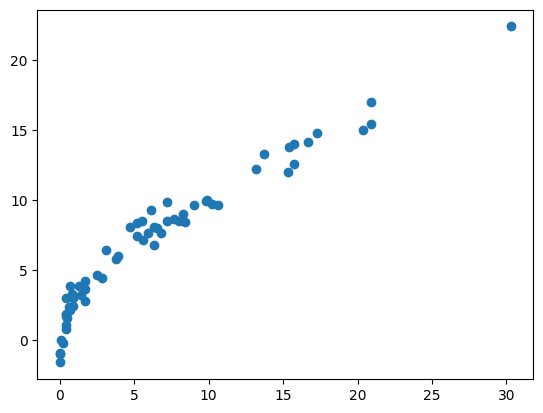

In [61]:
plt.scatter(y_test, y_pred)